n-gram review. Take a series of n-grams, where n is a number between 1 and the length of the sentence.

"Come all ye maidens young and fair"
(Come, all) - Bigram example
(Come, all, ye), (Come, all, ye, maidens), (Come, all, ye, maidens, young)

Come all ye maidens young and fair
And you that are blooming in your prime

First for loop:  
Come all ye maidens young and fair - iteration 1
for range(1, 7)

(come all ye),
(come all ye maidens)
Try to predict the last word given the words before it.

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np

In [ ]:
!wget --no-check-certificate \
  storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
  -O /tmp/irish-lyrics-eof.txt

--2020-07-10 15:23:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-07-10 15:23:28 (92.0 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)


    

In [ ]:
# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and labels
xs, labels = input_sequences[:, :-1],input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history= model.fit(xs, ys, epochs=100, verbose=1)
print(model)

Epoch 1/100
377/377 [==============================] - 23s 62ms/step - loss: 6.6758 - accuracy: 0.0694
Epoch 2/100
377/377 [==============================] - 23s 61ms/step - loss: 5.7873 - accuracy: 0.1088
Epoch 3/100
377/377 [==============================] - 24s 62ms/step - loss: 4.9483 - accuracy: 0.1566
Epoch 4/100
377/377 [==============================] - 24s 63ms/step - loss: 4.0552 - accuracy: 0.2288
Epoch 5/100
377/377 [==============================] - 23s 61ms/step - loss: 3.2272 - accuracy: 0.3278
Epoch 6/100
377/377 [==============================] - 23s 62ms/step - loss: 2.5318 - accuracy: 0.4357
Epoch 7/100
377/377 [==============================] - 24s 63ms/step - loss: 1.9832 - accuracy: 0.5436
Epoch 8/100
377/377 [==============================] - 24s 63ms/step - loss: 1.6443 - accuracy: 0.6160
Epoch 9/100
377/377 [==============================] - 24s 64ms/step - loss: 1.4036 - accuracy: 0.6652
Epoch 10/100
377/377 [==============================] - 23s 62ms/step - l

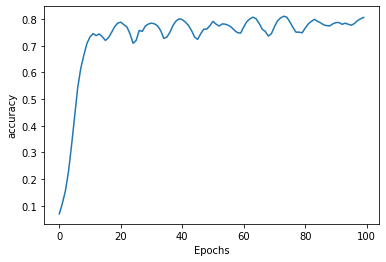

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
# Testing (testing 1 2)
seed_text = "I've got a bad feeling about this"
next_words = 100
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

I've got a bad feeling about this proud old ireland were to again my is grey gone love love love i love love love love love love love love love my side my side my love grew high high tower high gone alas i i love letters in gone and gone i love love love love wind my love love the wind gone and gone and gone the wind gone and yet love gone my love letters in rosy red lines sinking aboard and tenderest teacher bantry bay up gone alas i love love be love gone love gone i could not stand i fulfill eyes i
